# Automatidata Project 
**(Google Advanced Data Analytics)**

Author: Muhammad Fouzan Akhter

I completed the Google Advanced Data Analytics Course and worked on the Automatidata Project for my portfolio. Automatidata specializes in converting unused data into practical solutions for clients, such as dashboards and business insights. They are currently consulting for the NYC Taxi and Limousine Commission, developing a regression model to estimate taxi fares based on TLC data. This is my approach to this project among the various similar solutions available online.

In [1]:
#install or upgrade pandas
#pip install pandas
#pip install --upgrade pandas

#install or upgrade numpy
#pip install numpy
#pip install --upgrade numpy

#install or upgrade scipy
#pip install scipy
#pip install --upgrade scipy

#install or upgrade matplotlib
#pip install matplotlib
#pip install --upgrade matplotlib

#install or upgrade seaborn
#pip install seaborn
#pip install --upgrade seaborn

#install or upgrade scikit-learn
#pip install scikit-learn
#pip install --upgrade scikit-learn

#install or upgrade xgboost
#pip install xgboost
#pip install --upgrade xgboost

Installation and upgrade commands for required libraries are provided. Run these commands in your terminal, command prompt, or Jupyter Notebook cell. Note that some common libraries like pandas, numpy, and scikit-learn are often included in data science environments such as Anaconda or Google Colab and may not require separate installation or upgrades.


In [2]:
#importing required libraries:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, date, timedelta
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics  # For confusion matrix
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import (
    roc_auc_score,
    roc_curve,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
    ConfusionMatrixDisplay,
    RocCurveDisplay,
)
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from xgboost import plot_importance
import time

In [3]:
file_path = "C:\\Users\\Fouzan Akhter\\Desktop\\2017_Yellow_Taxi_Trip_Data.csv"

In [4]:
df_orig = pd.read_csv(file_path , index_col = 0)

In [5]:
df_orig.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
24870114,2,03/25/2017 8:55:43 AM,03/25/2017 9:09:47 AM,6,3.34,1,N,100,231,1,13.0,0.0,0.5,2.76,0.0,0.3,16.56
35634249,1,04/11/2017 2:53:28 PM,04/11/2017 3:19:58 PM,1,1.80,1,N,186,43,1,16.0,0.0,0.5,4.00,0.0,0.3,20.80
106203690,1,12/15/2017 7:26:56 AM,12/15/2017 7:34:08 AM,1,1.00,1,N,262,236,1,6.5,0.0,0.5,1.45,0.0,0.3,8.75
38942136,2,05/07/2017 1:17:59 PM,05/07/2017 1:48:14 PM,1,3.70,1,N,188,97,1,20.5,0.0,0.5,6.39,0.0,0.3,27.69
30841670,2,04/15/2017 11:32:20 PM,04/15/2017 11:49:03 PM,1,4.37,1,N,4,112,2,16.5,0.5,0.5,0.00,0.0,0.3,17.80


In [6]:
#checking for missing values:
print('Shape of dataframe:', df_orig.shape)
print('Shape of dataframe with duplicates dropped:', df_orig.drop_duplicates().shape)
print('Total count of missing values:', df_orig.isna().sum().sum())
print('Missing values per column:')
df_orig.isna().sum()

Shape of dataframe: (22699, 17)
Shape of dataframe with duplicates dropped: (22699, 17)
Total count of missing values: 0
Missing values per column:


VendorID                 0
tpep_pickup_datetime     0
tpep_dropoff_datetime    0
passenger_count          0
trip_distance            0
RatecodeID               0
store_and_fwd_flag       0
PULocationID             0
DOLocationID             0
payment_type             0
fare_amount              0
extra                    0
mta_tax                  0
tip_amount               0
tolls_amount             0
improvement_surcharge    0
total_amount             0
dtype: int64

In [7]:
df_orig.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22699 entries, 24870114 to 17208911
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   VendorID               22699 non-null  int64  
 1   tpep_pickup_datetime   22699 non-null  object 
 2   tpep_dropoff_datetime  22699 non-null  object 
 3   passenger_count        22699 non-null  int64  
 4   trip_distance          22699 non-null  float64
 5   RatecodeID             22699 non-null  int64  
 6   store_and_fwd_flag     22699 non-null  object 
 7   PULocationID           22699 non-null  int64  
 8   DOLocationID           22699 non-null  int64  
 9   payment_type           22699 non-null  int64  
 10  fare_amount            22699 non-null  float64
 11  extra                  22699 non-null  float64
 12  mta_tax                22699 non-null  float64
 13  tip_amount             22699 non-null  float64
 14  tolls_amount           22699 non-null  float

In [8]:
df_orig.shape

(22699, 17)

In [9]:
df_orig.describe()

,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
count,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000
mean,1.556236,1.642319,2.913313,1.043394,162.412353,161.527997,1.336887,13.026629,0.333275,0.497445,1.835781,0.312542,0.299551,16.310502
std,0.496838,1.285231,3.653171,0.708391,66.633373,70.139691,0.496211,13.243791,0.463097,0.039465,2.800626,1.399212,0.015673,16.097295
min,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,-120.000000,-1.000000,-0.500000,0.000000,0.000000,-0.300000,-120.300000
25%,1.000000,1.000000,0.990000,1.000000,114.000000,112.000000,1.000000,6.500000,0.000000,0.500000,0.000000,0.000000,0.300000,8.750000
50%,2.000000,1.000000,1.610000,1.000000,162.000000,162.000000,1.000000,9.500000,0.000000,0.500000,1.350000,0.000000,0.300000,11.800000
75%,2.000000,2.000000,3.060000,1.000000,233.000000,233.000000,2.000000,14.500000,0.500000,0.500000,2.450000,0.000000,0.300000,17.800000
max,2.000000,6.000000,33.960000,99.000000,265.000000,265.000000,4.000000,999.990000,4.500000,0.500000,200.000000,19.100000,0.300000,1200.290000


**Analyzing the Relationship b/w 'fare_amount' & 'payment_type' Columns:**

The dataset represents `payment_type` with integer encodings:

*   1: Credit card
*   2: Cash
*   3: No charge
*   4: Dispute
*   5: Unknown

In [10]:
df_orig.groupby('payment_type')['fare_amount'].mean()

payment_type
1    13.429748
2    12.213546
3    12.186116
4     9.913043
Name: fare_amount, dtype: float64

The analysis indicates that customers who use credit cards tend to have a higher average fare amount compared to those who pay in cash. However, to ascertain whether this observed difference is statistically significant and not merely due to random sampling, a hypothesis test is conducted. This test aims to determine if the disparity in fare amounts between credit card and cash payments is statistically reliable or if it could occur by chance.

$H_0$: No difference in the average fare amount between customers who use credit cards and who use cash.

$H_A$: Is a difference in the average fare amount between customers who use credit cards and who use cash.

In [11]:
#performing hypothesis testing:
credit_card = df_orig[df_orig['payment_type'] == 1]['fare_amount']
cash = df_orig[df_orig['payment_type'] == 2]['fare_amount']
stats.ttest_ind(a=credit_card, b=cash, equal_var=False)

Ttest_indResult(statistic=6.866800855655372, pvalue=6.797387473030518e-12)


Given that the p-value is considerably lower than the 5% significance level, the null hypothesis is rejected.

**Building a Multiple Linear Regression Model**

In [12]:
#making a copy of the original dataset:
df = df_orig.copy()

In [13]:
#converting 'pickup' & 'dropoff' columns to datetime:
print('Data type of tpep_pickup_datetime:', df['tpep_pickup_datetime'].dtype)
print('Data type of tpep_dropoff_datetime:', df['tpep_dropoff_datetime'].dtype)
df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'], format='%m/%d/%Y %I:%M:%S %p')
df['tpep_dropoff_datetime'] = pd.to_datetime(df['tpep_dropoff_datetime'], format='%m/%d/%Y %I:%M:%S %p')
print('Data type of tpep_pickup_datetime:', df['tpep_pickup_datetime'].dtype)
print('Data type of tpep_dropoff_datetime:', df['tpep_dropoff_datetime'].dtype)

Data type of tpep_pickup_datetime: object
Data type of tpep_dropoff_datetime: object
Data type of tpep_pickup_datetime: datetime64[ns]
Data type of tpep_dropoff_datetime: datetime64[ns]



Add a new column named `duration` to the dataset, indicating the total duration of each taxi ride in minutes.

In [14]:
df['duration'] = (df['tpep_dropoff_datetime'] - df['tpep_pickup_datetime'])/np.timedelta64(1,'m')

Plot a box plot for each feature: `trip_distance`, `fare_amount`, `duration` (to check for outliers)

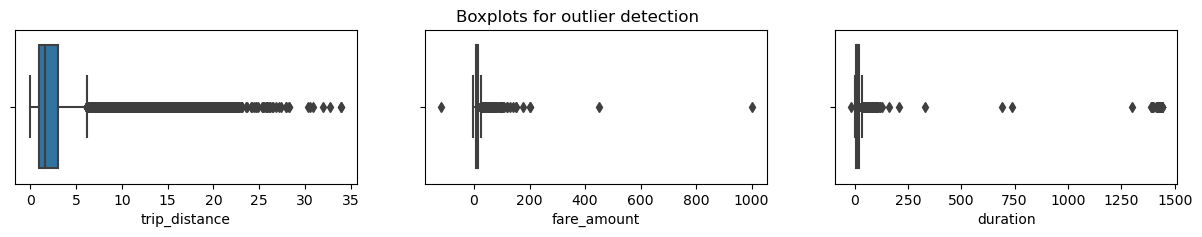

In [15]:
fig, axes = plt.subplots(1, 3, figsize=(15, 2))
fig.suptitle('Boxplots for outlier detection')
sns.boxplot(ax=axes[0], x=df['trip_distance'])
sns.boxplot(ax=axes[1], x=df['fare_amount'])
sns.boxplot(ax=axes[2], x=df['duration'])
plt.show();


All three variables exhibit outliers, with some being extreme while others are less so. The distance from the southern tip of Staten Island to the northern end of Manhattan is approximately 30 miles in a straight line. Considering this geographical context and the distribution of values in the corresponding column, it appears reasonable to refrain from modifying those specific values. However, the variables for `fare_amount` and `duration` seem to contain problematic outliers on the higher end. In contrast, the outliers in `trip_distance` might be more acceptable.

**Handling Outliers**

In [16]:
print(sorted(set(df['trip_distance']))[:10])
print(sum(df['trip_distance']==0))

[0.0, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09]
148


The recorded distances exhibit a high level of precision, yet the presence of zero values in the dataset suggests the occurrence of trips where passengers summoned a taxi but subsequently changed their plans. However, the prevalence of zero values is minimal, with only 148 instances among approximately 23,000 rides, rendering it relatively inconsequential. While one could consider imputing these instances with a small non-zero value like 0.01, such a modification is unlikely to significantly impact the overall model. Consequently, the `trip_distance` column will be retained without alterations concerning outliers.

In [17]:
df['fare_amount'].describe()

count    22699.000000
mean        13.026629
std         13.243791
min       -120.000000
25%          6.500000
50%          9.500000
75%         14.500000
max        999.990000
Name: fare_amount, dtype: float64

In [18]:
#impute values less than $0 with 0
df.loc[df['fare_amount'] < 0, 'fare_amount'] = 0
df['fare_amount'].min()

0.0

In [19]:
def outlier_imputer(column_list, iqr_factor):
    '''
    Impute upper-limit values in specified columns based on their interquartile range.

    Arguments:
        column_list: A list of columns to iterate over
        iqr_factor: A number representing x in the formula:
                    Q3 + (x * IQR). Used to determine maximum threshold,
                    beyond which a point is considered an outlier.

    The IQR is computed for each column in column_list and values exceeding
    the upper threshold for each column are imputed with the upper threshold value.
    '''
    for col in column_list:
        # Reassign minimum to zero
        df.loc[df[col] < 0, col] = 0

        # Calculate upper threshold
        q1 = df[col].quantile(0.25)
        q3 = df[col].quantile(0.75)
        iqr = q3 - q1
        upper_threshold = q3 + (iqr_factor * iqr)
        print(col)
        print('q3:', q3)
        print('upper_threshold:', upper_threshold)

        # Reassign values > threshold to threshold
        df.loc[df[col] > upper_threshold, col] = upper_threshold
        print(df[col].describe())
        print()

In [20]:
outlier_imputer(['fare_amount'], 6)

fare_amount
q3: 14.5
upper_threshold: 62.5
count    22699.000000
mean        12.897913
std         10.541137
min          0.000000
25%          6.500000
50%          9.500000
75%         14.500000
max         62.500000
Name: fare_amount, dtype: float64



In [21]:
df['duration'].describe()

count    22699.000000
mean        17.013777
std         61.996482
min        -16.983333
25%          6.650000
50%         11.183333
75%         18.383333
max       1439.550000
Name: duration, dtype: float64

In [22]:
df.loc[df['duration'] < 0, 'duration'] = 0
df['duration'].min()
outlier_imputer(['duration'], 6)

duration
q3: 18.383333333333333
upper_threshold: 88.78333333333333
count    22699.000000
mean        14.460555
std         11.947043
min          0.000000
25%          6.650000
50%         11.183333
75%         18.383333
max         88.783333
Name: duration, dtype: float64



**Feature Engineering**

In [23]:
#engineering a 'mean_distance' column
df['pickup_dropoff'] = df['PULocationID'].astype(str) + ' ' + df['DOLocationID'].astype(str)
grouped = df.groupby('pickup_dropoff').mean(numeric_only=True)[['trip_distance']]
grouped_dict = grouped.to_dict()
grouped_dict = grouped_dict['trip_distance']
df['mean_distance'] = df['pickup_dropoff']
df['mean_distance'] = df['mean_distance'].map(grouped_dict)

In [24]:
#engineering a 'mean_duration' column
grouped = df.groupby('pickup_dropoff').mean(numeric_only=True)[['duration']]
grouped_dict = grouped.to_dict()
grouped_dict = grouped_dict['duration']
df['mean_duration'] = df['pickup_dropoff']
df['mean_duration'] = df['mean_duration'].map(grouped_dict)

In [25]:
#creating 'day' and 'month' columns
df['day'] = df['tpep_pickup_datetime'].dt.day_name().str.lower()
df['month'] = df['tpep_pickup_datetime'].dt.strftime('%b').str.lower()

In [26]:
#creating 'rush_hour' column
df['rush_hour'] = df['tpep_pickup_datetime'].dt.hour
df.loc[df['day'].isin(['saturday', 'sunday']), 'rush_hour'] = 0
def rush_hourizer(hour):
    if 6 <= hour['rush_hour'] < 10:
        val = 1
    elif 16 <= hour['rush_hour'] < 20:
        val = 1
    else:
        val = 0
    return val
df.loc[(df.day != 'saturday') & (df.day != 'sunday'), 'rush_hour'] = df.apply(rush_hourizer, axis=1)

**Data Analysis**

Create a scatterplot to visualize the relationship between `mean_duration` and `fare_amount`

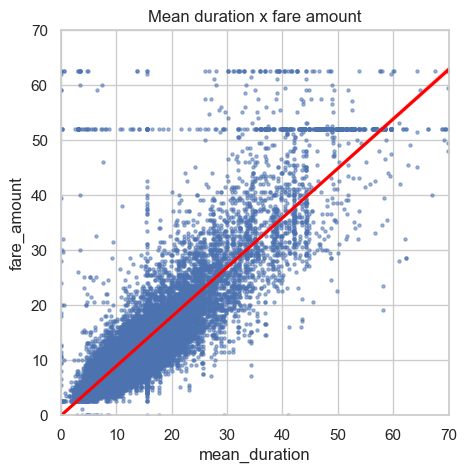

In [27]:
sns.set(style='whitegrid')
f = plt.figure()
f.set_figwidth(5)
f.set_figheight(5)
sns.regplot(x=df['mean_duration'], y=df['fare_amount'],
            scatter_kws={'alpha':0.5, 's':5},
            line_kws={'color':'red'})
plt.ylim(0, 70)
plt.xlim(0, 70)
plt.title('Mean duration x fare amount')
plt.show()

In [28]:
df[df['fare_amount'] > 50]['fare_amount'].value_counts().head()

52.0    514
62.5     84
59.0      9
50.5      9
57.5      8
Name: fare_amount, dtype: int64

There are 514 trips with a fare amount of $52.

In [29]:
pd.set_option('display.max_columns', None)
df[df['fare_amount']==52].head(30)

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,duration,pickup_dropoff,mean_distance,mean_duration,day,month,rush_hour
18600059,2,2017-03-05 19:15:30,2017-03-05 19:52:18,2,18.90,2,N,236,132,1,52.0,0.0,0.5,14.58,5.54,0.3,72.92,36.800000,236 132,19.211667,40.500000,sunday,mar,0
47959795,1,2017-06-03 14:24:57,2017-06-03 15:31:48,1,18.00,2,N,132,163,1,52.0,0.0,0.5,0.00,0.00,0.3,52.80,66.850000,132 163,19.229000,52.941667,saturday,jun,0
95729204,2,2017-11-11 20:16:16,2017-11-11 20:17:14,1,0.23,2,N,132,132,2,52.0,0.0,0.5,0.00,0.00,0.3,52.80,0.966667,132 132,2.255862,3.021839,saturday,nov,0
103404868,2,2017-12-06 23:37:08,2017-12-07 00:06:19,1,18.93,2,N,132,79,2,52.0,0.0,0.5,0.00,0.00,0.3,52.80,29.183333,132 79,19.431667,47.275000,wednesday,dec,0
80479432,2,2017-09-24 23:45:45,2017-09-25 00:15:14,1,17.99,2,N,132,234,1,52.0,0.0,0.5,14.64,5.76,0.3,73.20,29.483333,132 234,17.654000,49.833333,sunday,sep,0
16226157,1,2017-02-28 18:30:05,2017-02-28 19:09:55,1,18.40,2,N,132,48,2,52.0,4.5,0.5,0.00,5.54,0.3,62.84,39.833333,132 48,18.761905,58.246032,tuesday,feb,1
55253442,2,2017-06-05 12:51:58,2017-06-05 13:07:35,1,4.73,2,N,228,88,2,52.0,0.0,0.5,0.00,5.76,0.3,58.56,15.616667,228 88,4.730000,15.616667,monday,jun,0
65900029,2,2017-08-03 22:47:14,2017-08-03 23:32:41,2,18.21,2,N,132,48,2,52.0,0.0,0.5,0.00,5.76,0.3,58.56,45.450000,132 48,18.761905,58.246032,thursday,aug,0
80904240,2,2017-09-26 13:48:26,2017-09-26 14:31:17,1,17.27,2,N,186,132,2,52.0,0.0,0.5,0.00,5.76,0.3,58.56,42.850000,186 132,17.096000,42.920000,tuesday,sep,0
33706214,2,2017-04-23 21:34:48,2017-04-23 22:46:23,6,18.34,2,N,132,148,1,52.0,0.0,0.5,5.00,0.00,0.3,57.80,71.583333,132 148,17.994286,46.340476,sunday,apr,0


**Isolating Modelling Variables**

In [30]:
df_model = df.copy()
df_model = df_model.drop(['tpep_dropoff_datetime', 'tpep_pickup_datetime',
               'trip_distance', 'RatecodeID', 'store_and_fwd_flag', 'PULocationID', 'DOLocationID',
               'payment_type', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
               'total_amount', 'tpep_dropoff_datetime', 'tpep_pickup_datetime', 'duration',
               'pickup_dropoff', 'day', 'month'
               ], axis=1)
df_model.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22699 entries, 24870114 to 17208911
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   VendorID         22699 non-null  int64  
 1   passenger_count  22699 non-null  int64  
 2   fare_amount      22699 non-null  float64
 3   mean_distance    22699 non-null  float64
 4   mean_duration    22699 non-null  float64
 5   rush_hour        22699 non-null  int64  
dtypes: float64(3), int64(3)
memory usage: 1.7 MB


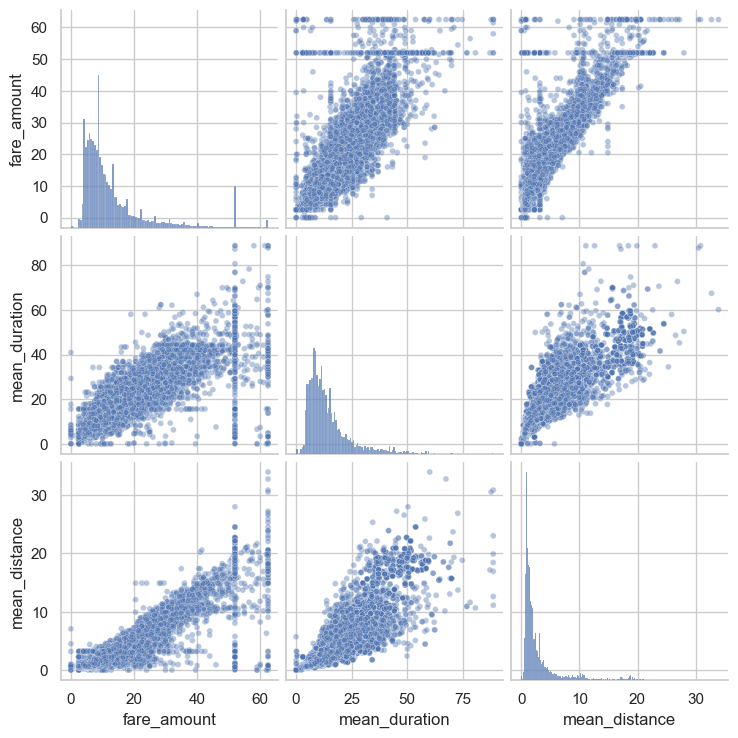

In [31]:
#creating a pairplot to visualize pairwise relationships between variables in the data
sns.pairplot(df_model[['fare_amount', 'mean_duration', 'mean_distance']],
             plot_kws={'alpha':0.4, 'size':5},
             );

In [32]:
#creating correlation matrix containing pairwise correlation of columns, using pearson correlation coefficient
df_model.corr(method='pearson')

,VendorID,passenger_count,fare_amount,mean_distance,mean_duration,rush_hour
VendorID,1.000000,0.266463,0.001045,0.004741,0.001876,-0.002874
passenger_count,0.266463,1.000000,0.014942,0.013428,0.015852,-0.022035
fare_amount,0.001045,0.014942,1.000000,0.910185,0.859105,-0.020075
mean_distance,0.004741,0.013428,0.910185,1.000000,0.874864,-0.039725
mean_duration,0.001876,0.015852,0.859105,0.874864,1.000000,-0.021583
rush_hour,-0.002874,-0.022035,-0.020075,-0.039725,-0.021583,1.000000


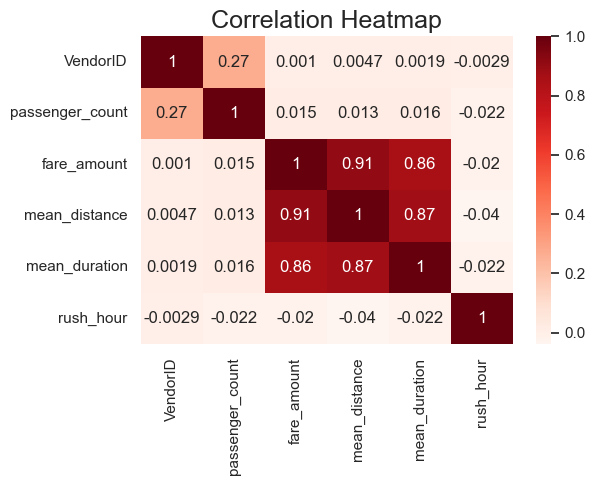

In [33]:
#visualize correlation through a heatmap
plt.figure(figsize=(6,4))
sns.heatmap(df_model.corr(method='pearson'), annot=True, cmap='Reds')
plt.title('Correlation Heatmap',
          fontsize=18)
plt.show()


Both `mean_duration` and `mean_distance` exhibit a strong correlation with the target variable `fare_amount`, and they also share a notable correlation with each other, showing a Pearson correlation coefficient of 0.87. It's crucial to remember that highly correlated predictor variables can pose challenges for linear regression models when the goal is to draw statistical inferences about the data. However, if the primary objective is accurate prediction rather than using the model for data insights, correlated predictor variables can still be employed effectively. In this case, the model aims to predict `fare_amount`, which will serve as a predictor variable in machine learning models. Therefore, despite their correlation, both `mean_duration` and `mean_distance` will be included in the modeling process.

**Splitting data into Dependant & Independant Variables:**

In [34]:
X = df_model.drop(columns=['fare_amount'])
y = df_model[['fare_amount']]

**One-Hot (Dummy) Encode the Categorical Variables:**

In [35]:
X['VendorID'] = X['VendorID'].astype(str)
X = pd.get_dummies(X, drop_first=True)

**Splitting data into Training and Testing Sets:**

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

**Standardize the Data:**

Use `StandardScaler()`, `fit()`, and `transform()` to standardize the `X_train` variables. Assign the results to a variable called `X_train_scaled`.

In [37]:
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

**Building & Evaluating the Linear Regression Model:**

In [38]:
lr=LinearRegression()
lr.fit(X_train_scaled, y_train)

LinearRegression()

In [39]:
#evaluating the model performance on the training data:
r_sq = lr.score(X_train_scaled, y_train)
print('Coefficient of determination:', r_sq)
y_pred_train = lr.predict(X_train_scaled)
print('R^2:', r2_score(y_train, y_pred_train))
print('MAE:', mean_absolute_error(y_train, y_pred_train))
print('MSE:', mean_squared_error(y_train, y_pred_train))
print('RMSE:',np.sqrt(mean_squared_error(y_train, y_pred_train)))

Coefficient of determination: 0.8398434585044773
R^2: 0.8398434585044773
MAE: 2.1866664167754144
MSE: 17.88973296349268
RMSE: 4.229625629236313


In [40]:
#evaluating the model performance on the testing data:
r_sq_test = lr.score(X_test_scaled, y_test)
print('Coefficient of determination:', r_sq_test)
y_pred_test = lr.predict(X_test_scaled)
print('R^2:', r2_score(y_test, y_pred_test))
print('MAE:', mean_absolute_error(y_test,y_pred_test))
print('MSE:', mean_squared_error(y_test, y_pred_test))
print('RMSE:',np.sqrt(mean_squared_error(y_test, y_pred_test)))

Coefficient of determination: 0.8682583641795454
R^2: 0.8682583641795454
MAE: 2.1336549840593877
MSE: 14.326454156998947
RMSE: 3.7850302716093234


The model demonstrates strong performance on both the training and test sets, indicating minimal bias and suggesting that overfitting is not a concern. Notably, the test scores outperformed the training scores, further highlighting the effectiveness of the model. For the test data, an R<sup>2</sup> of 0.868 means that 86.8% of the variance in the `fare_amount` variable is described by the model. The mean absolute error proves informative in this context because, for the model's objectives, an error of two is not considered more than twice as impactful as an error of one.

**Visualizing Model Results**

In [41]:
#creating a results dataframe:
results = pd.DataFrame(data={'actual': y_test['fare_amount'],
                             'predicted': y_pred_test.ravel()})
results['residual'] = results['actual'] - results['predicted']

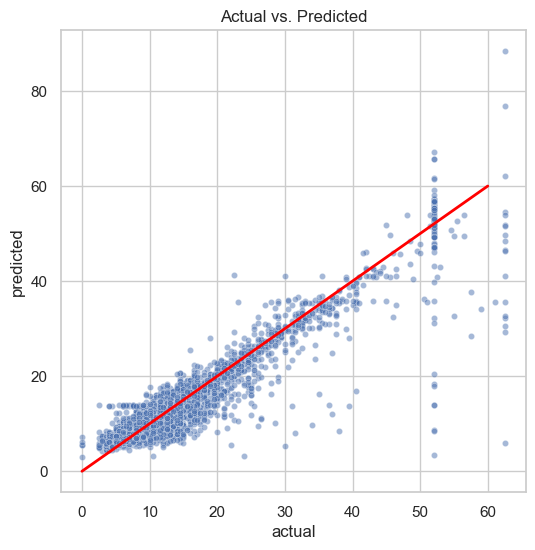

In [42]:
fig, ax = plt.subplots(figsize=(6, 6))
sns.set(style='whitegrid')
sns.scatterplot(x='actual',
                y='predicted',
                data=results,
                s=20,
                alpha=0.5,
                ax=ax
)
plt.plot([0,60], [0,60], c='red', linewidth=2)
plt.title('Actual vs. Predicted');

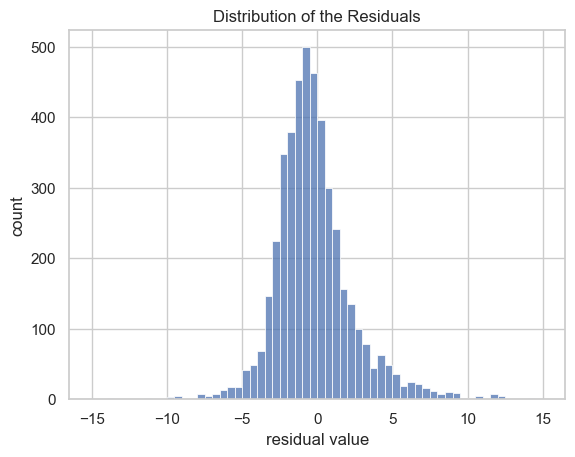

In [43]:
#visualizing the distribution of the `residuals`
sns.histplot(results['residual'], bins=np.arange(-15,15.5,0.5))
plt.title('Distribution of the Residuals')
plt.xlabel('residual value')
plt.ylabel('count');

In [44]:
results['residual'].mean()

-0.015442621528680443

The residuals exhibit an approximately normal distribution with a mean of -0.015. Residuals signify the unexplained variance in the outcome variable by the model. The normal distribution around zero is favorable, indicating that the model's errors are evenly distributed and unbiased.

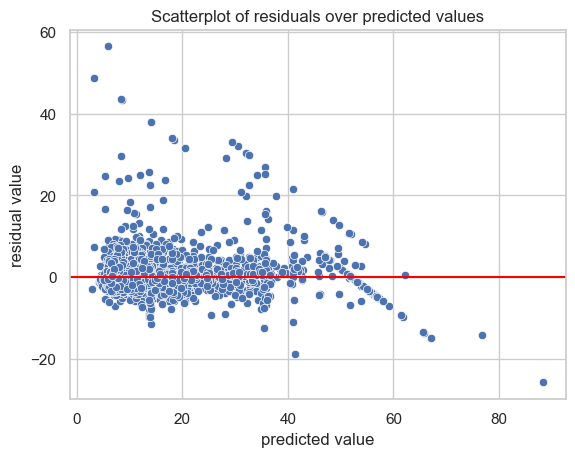

In [45]:
#creating a scatterplot of `residuals` over `predicted`:
sns.scatterplot(x='predicted', y='residual', data=results)
plt.axhline(0, c='red')
plt.title('Scatterplot of residuals over predicted values')
plt.xlabel('predicted value')
plt.ylabel('residual value')
plt.show()

**Summarizing Results:**

In [46]:
coefficients = pd.DataFrame(lr.coef_, columns=X.columns)
coefficients

,passenger_count,mean_distance,mean_duration,rush_hour,VendorID_2
0,0.030825,7.133867,2.812115,0.110233,-0.054373



The coefficients indicate that `mean_distance` had the most significant influence on the model's final prediction. The coefficients indicate that, when translated back to miles instead of standard deviation, `mean_distance` had the most substantial impact on the model's final prediction.

In [47]:
print(X_train['mean_distance'].std())
print(7.133867 / X_train['mean_distance'].std())

3.574812975256415
1.9955916713344426


For every 3.57 miles traveled, the fare increased by an average of \\$7.13. Alternatively, expressed in a reduced manner, for every 1 mile traveled, the fare increased by a mean of \\$2.00.

**Predicting Fare on Entire Dataset with the Linear Regression Model:**

In [48]:
X_scaled = scaler.transform(X)
y_preds_full = lr.predict(X_scaled)

Some fare predictions are unnecessary and can be directly imputed based on their rate code. In particular, all instances where the `RatecodeID` is 2 should be imputed with \\$52, as this rate signifies a flat fee for trips to JFK airport. Impute \\$52 for all predictions where `RatecodeID` is 2.

In [49]:
final_preds = df[['RatecodeID']].copy()
final_preds['y_preds_full'] = y_preds_full
final_preds.loc[final_preds['RatecodeID']==2, 'y_preds_full'] = 52

In [50]:
#evaluating model performance on entire dataset:
final_preds = final_preds['y_preds_full']
print('R^2:', r2_score(y, final_preds))
print('MAE:', mean_absolute_error(y, final_preds))
print('MSE:', mean_squared_error(y, final_preds))
print('RMSE:',np.sqrt(mean_squared_error(y, final_preds)))

R^2: 0.8910853978683975
MAE: 1.9925062522699752
MSE: 12.101575504689938
RMSE: 3.4787318816905017


In [51]:
#combining means columns with predictions column:
pred_features = df[['mean_duration', 'mean_distance']].copy()
pred_features['predicted_fare'] = final_preds

### Constructing a Model to Predict whether Customer will or will not Tip
Constructing a machine learning model designed to predict whether a customer is unlikely to leave a tip. The intention is to implement this model in an application that will notify taxi drivers about customers who are less likely to provide a tip.

In [52]:
#combining original dataframe, and the pred_features dataframe:
df_ml = df_orig.merge(pred_features,
                left_index=True,
                right_index=True)

**Analysis & Feature Engineering**

In [53]:
df_ml.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22699 entries, 24870114 to 17208911
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   VendorID               22699 non-null  int64  
 1   tpep_pickup_datetime   22699 non-null  object 
 2   tpep_dropoff_datetime  22699 non-null  object 
 3   passenger_count        22699 non-null  int64  
 4   trip_distance          22699 non-null  float64
 5   RatecodeID             22699 non-null  int64  
 6   store_and_fwd_flag     22699 non-null  object 
 7   PULocationID           22699 non-null  int64  
 8   DOLocationID           22699 non-null  int64  
 9   payment_type           22699 non-null  int64  
 10  fare_amount            22699 non-null  float64
 11  extra                  22699 non-null  float64
 12  mta_tax                22699 non-null  float64
 13  tip_amount             22699 non-null  float64
 14  tolls_amount           22699 non-null  float

To align with the modeling objective, where the assumption is that customers who pay with cash generally have a tip amount of \\$0, it is necessary to sample the data selectively. Specifically, the focus should be on selecting only the customers who pay with a credit card.

In [54]:
# Subset the data to isolate only customers who paid by credit card
df1 = df_ml[df_ml['payment_type']==1]

Observe that there is no existing column indicating the tip percentage, which is essential for creating the target variable. It becomes necessary to engineer this column to proceed with the modeling process.
Add a `tip_percent` column to the dataframe by performing the following calculation:  
<br/>  

$$tip\ percent = \frac{tip\ amount}{total\ amount - tip\ amount}$$  

In [55]:
#creating a tip percentage column:
df1 = df1.copy()
df1['tip_percent'] = round(df1['tip_amount'] / (df1['total_amount'] - df1['tip_amount']), 3)

Generate a new column: `generous` to serve as the target variable. This binary indicator will be set to 1 if a customer tipped 20% or more and 0 otherwise.

In [56]:
df1['generous'] = df1['tip_percent']
df1['generous'] = (df1['generous'] >= 0.2)
df1['generous'] = df1['generous'].astype(int)

In [57]:
#converting 'pickup' and 'dropoff' cols to datetime:
df1['tpep_pickup_datetime'] = pd.to_datetime(df1['tpep_pickup_datetime'], format='%m/%d/%Y %I:%M:%S %p')
df1['tpep_dropoff_datetime'] = pd.to_datetime(df1['tpep_dropoff_datetime'], format='%m/%d/%Y %I:%M:%S %p')

In [58]:
#creating a 'day' col:
df1['day'] = df1['tpep_pickup_datetime'].dt.day_name().str.lower()

Create four additional columns to represent time-of-day bins. Each column will consist of binary values (0=no, 1=yes), signifying whether a trip commenced (picked up) during the specified time intervals:

`am_rush` = [06:00&ndash;10:00)  
`daytime` = [10:00&ndash;16:00)  
`pm_rush` = [16:00&ndash;20:00)  
`nighttime` = [20:00&ndash;06:00)  

In [59]:
df1['am_rush'] = df1['tpep_pickup_datetime'].dt.hour
df1['daytime'] = df1['tpep_pickup_datetime'].dt.hour
df1['pm_rush'] = df1['tpep_pickup_datetime'].dt.hour
df1['nighttime'] = df1['tpep_pickup_datetime'].dt.hour

In [60]:
#defining 'am_rush()' conversion function [06:00–10:00)
def am_rush(hour):
    if 6 <= hour['am_rush'] < 10:
        val = 1
    else:
        val = 0
    return val

In [61]:
#applying 'am_rush' function to the 'am_rush' series
df1['am_rush'] = df1.apply(am_rush, axis=1)

In [62]:
#defining 'daytime()' conversion function [10:00–16:00)
def daytime(hour):
    if 10 <= hour['daytime'] < 16:
        val = 1
    else:
        val = 0
    return val

In [63]:
#applying 'daytime' function to the 'daytime' series
df1['daytime'] = df1.apply(daytime, axis=1)

In [64]:
#defining 'pm_rush()' conversion function [16:00–20:00)
def pm_rush(hour):
    if 16 <= hour['pm_rush'] < 20:
        val = 1
    else:
        val = 0
    return val

In [65]:
#applying 'pm_rush' function to the 'pm_rush' series
df1['pm_rush'] = df1.apply(pm_rush, axis=1)

In [66]:
#defining 'nighttime()' conversion function [20:00–06:00)
def nighttime(hour):
    if 20 <= hour['nighttime'] < 24:
        val = 1
    elif 0 <= hour['nighttime'] < 6:
        val = 1
    else:
        val = 0
    return val

In [67]:
#applying 'nighttime' function to the 'nighttime' series
df1['nighttime'] = df1.apply(nighttime, axis=1)

**Preparing Dataset for Machine Learning Model:**

In [68]:
#creating 'month' column:
df1['month'] = df1['tpep_pickup_datetime'].dt.strftime('%b').str.lower()

In [69]:
#dropping irrelevant columns:
drop_cols = ['tpep_pickup_datetime', 'tpep_dropoff_datetime',
             'payment_type', 'trip_distance', 'store_and_fwd_flag', 'payment_type',
             'fare_amount', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount',
             'improvement_surcharge', 'total_amount', 'tip_percent']

df1 = df1.drop(drop_cols, axis=1)
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15265 entries, 24870114 to 17208911
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   VendorID         15265 non-null  int64  
 1   passenger_count  15265 non-null  int64  
 2   RatecodeID       15265 non-null  int64  
 3   PULocationID     15265 non-null  int64  
 4   DOLocationID     15265 non-null  int64  
 5   mean_duration    15265 non-null  float64
 6   mean_distance    15265 non-null  float64
 7   predicted_fare   15265 non-null  float64
 8   generous         15265 non-null  int32  
 9   day              15265 non-null  object 
 10  am_rush          15265 non-null  int64  
 11  daytime          15265 non-null  int64  
 12  pm_rush          15265 non-null  int64  
 13  nighttime        15265 non-null  int64  
 14  month            15265 non-null  object 
dtypes: float64(3), int32(1), int64(9), object(2)
memory usage: 1.8+ MB


**Variable Encoding:**

In [70]:
cols_to_str = ['RatecodeID', 'PULocationID', 'DOLocationID', 'VendorID']
for col in cols_to_str:
    df1[col] = df1[col].astype('str')
df2 = pd.get_dummies(df1, drop_first=True)
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15265 entries, 24870114 to 17208911
Columns: 347 entries, passenger_count to month_sep
dtypes: float64(3), int32(1), int64(5), uint8(338)
memory usage: 6.0 MB


In [71]:
#checking for class balance of 'generous' column:
df2['generous'].value_counts(normalize=True)

1    0.526368
0    0.473632
Name: generous, dtype: float64

Slightly over half of the customers in this dataset are categorized as "generous" (tipped ≥ 20%), resulting in a nearly balanced dataset. In the context of cab drivers, false positives are more problematic as they might pick up a customer expecting a good tip and end up disappointed. On the other hand, false negatives are more detrimental for customers, as a cab driver might opt for a different customer predicted to tip more, even if the original customer would have tipped generously. 

Given the relatively even stakes, the objective is to assist taxi drivers in increasing their earnings without causing dissatisfaction among customers. The chosen metric should equally consider both precision and recall. The F<sub>1</sub> score emerges as an appropriate metric since it provides equal weight to true positives and false positives, effectively balancing precision and recall.

In [72]:
#splitting data into training and testing sets:
y = df2['generous']
X = df2.drop('generous', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

**Building a Random Forest Model:**

In [73]:
rf = RandomForestClassifier(random_state=42)
cv_params = {'max_depth': [None],
             'max_features': [1.0],
             'max_samples': [0.7],
             'min_samples_leaf': [1],
             'min_samples_split': [2],
             'n_estimators': [300]
             }
#only one value used for each hyperparameter for the purpose of simplicity
scoring = ('accuracy', 'precision', 'recall', 'f1')
rf1 = GridSearchCV(rf, cv_params, scoring=scoring, cv=4, refit='f1')

In [74]:
%%time
rf1.fit(X_train, y_train)

CPU times: total: 6min 57s
Wall time: 6min 57s


GridSearchCV(cv=4, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [None], 'max_features': [1.0],
                         'max_samples': [0.7], 'min_samples_leaf': [1],
                         'min_samples_split': [2], 'n_estimators': [300]},
             refit='f1', scoring=('accuracy', 'precision', 'recall', 'f1'))

In [75]:
#examining the best average score across all the validation folds 
rf1.best_score_

0.7136009788848705

In [76]:
#examining the best combination of hyperparameters
rf1.best_params_

{'max_depth': None,
 'max_features': 1.0,
 'max_samples': 0.7,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 300}

In [77]:
def make_results(model_name:str, model_object, metric:str):
    '''
    Arguments:
    model_name (string): desired name for the model in the output table
    model_object: a fitted GridSearchCV object
    metric (string): evaluation metric, can be precision, recall, f1, or accuracy

    Returns a pandas DataFrame containing F1, recall, precision, and accuracy scores
    for the model with the best mean 'metric' score across all validation folds.

    '''
    metric_dict = {'precision': 'mean_test_precision',
                 'recall': 'mean_test_recall',
                 'f1': 'mean_test_f1',
                 'accuracy': 'mean_test_accuracy',
                 }
    cv_results = pd.DataFrame(model_object.cv_results_)
    best_estimator_results = cv_results.iloc[cv_results[metric_dict[metric]].idxmax(), :]
    f1 = best_estimator_results.mean_test_f1
    recall = best_estimator_results.mean_test_recall
    precision = best_estimator_results.mean_test_precision
    accuracy = best_estimator_results.mean_test_accuracy
    table = pd.DataFrame({'model': [model_name],
                        'precision': [precision],
                        'recall': [recall],
                        'F1': [f1],
                        'accuracy': [accuracy],
                        },
                       )
    return table

In [78]:
results = make_results('Random Forest', rf1, 'f1')
results

,model,precision,recall,F1,accuracy
0,Random Forest,0.674919,0.757312,0.713601,0.680233


This model is deemed acceptable across various metrics. Generally, scores of 0.65 or higher are considered satisfactory, though the appropriateness of the threshold depends on the specific use case. 

**Getting Scores on Testing Data**


In [79]:
rf_preds = rf1.best_estimator_.predict(X_test)

Utilize the provided `get_test_scores()` function to display the model's scores on the test data:


In [80]:
def get_test_scores(model_name:str, preds, y_test_data):
    '''
    Generate a table of test scores.

    Inputs:
    - model_name (string): User-specified name for the model in the output table
    - preds (numpy array): Test predictions
    - y_test_data (numpy array): Ground truth values for y_test

    Output:
    - table (pandas DataFrame): DataFrame containing precision, recall, f1, and accuracy scores for the model

    '''
    accuracy = accuracy_score(y_test_data, preds)
    precision = precision_score(y_test_data, preds)
    recall = recall_score(y_test_data, preds)
    f1 = f1_score(y_test_data, preds)
    table = pd.DataFrame({'model': [model_name],
                        'precision': [precision],
                        'recall': [recall],
                        'F1': [f1],
                        'accuracy': [accuracy]
                        })
    return table

In [81]:
#getting scores on test data:
rf_test_scores = get_test_scores('RandomForest (Test)', rf_preds, y_test)
results = pd.concat([results, rf_test_scores], axis=0)
results

,model,precision,recall,F1,accuracy
0,Random Forest,0.674919,0.757312,0.713601,0.680233
0,RandomForest (Test),0.675297,0.779091,0.723490,0.686538


Trying to improve the results using a different Machine Learning Model named as XGBoost:

In [82]:
xgb = XGBClassifier(objective='binary:logistic', random_state=0)
cv_params = {'learning_rate': [0.1],
             'max_depth': [8],
             'min_child_weight': [2],
             'n_estimators': [500]
             }
scoring = ('accuracy', 'precision', 'recall', 'f1')

In [83]:
xgb1 = GridSearchCV(xgb, cv_params, scoring=scoring, cv=4, refit='f1')

In [84]:
#now fit the model to the X_train and y_train data:
xgb1.fit(X_train, y_train)

GridSearchCV(cv=4,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=0, ...),
             param_grid={'learning_rate': [0.1], 'max_depth': [8],
                         'min_child_weight': [2], 'n_estimators': [500]},
             refit='f1', scoring=('accuracy', 'precision', 'recall', 'f1'))

In [85]:
#examining the best score:
xgb1.best_score_

0.6955124635485908

In [86]:
#examining the best parameters:
xgb1.best_params_

{'learning_rate': 0.1,
 'max_depth': 8,
 'min_child_weight': 2,
 'n_estimators': 500}

Utilize the `make_results()` function to display all scores generated by your model.

In [87]:
xgb1_cv_results = make_results('XGBoost Model', xgb1, 'f1')
results = pd.concat([results, xgb1_cv_results], axis=0)
results

,model,precision,recall,F1,accuracy
0,Random Forest,0.674919,0.757312,0.713601,0.680233
0,RandomForest (Test),0.675297,0.779091,0.723490,0.686538
0,XGBoost Model,0.669726,0.723553,0.695512,0.666557


In [88]:
#getting scores on testing data:
xgb_preds = xgb1.best_estimator_.predict(X_test)

In [89]:
#ammending scores of testing data:
xgb_test_scores = get_test_scores('XGBoost (Test)', xgb_preds, y_test)
results = pd.concat([results, xgb_test_scores], axis=0)
results

,model,precision,recall,F1,accuracy
0,Random Forest,0.674919,0.757312,0.713601,0.680233
0,RandomForest (Test),0.675297,0.779091,0.723490,0.686538
0,XGBoost Model,0.669726,0.723553,0.695512,0.666557
0,XGBoost (Test),0.677219,0.745488,0.709716,0.679004


Both models meet the criteria for acceptability, with the random forest model emerging as the preferred choice.

**Plotting a Confusion Matrix:**

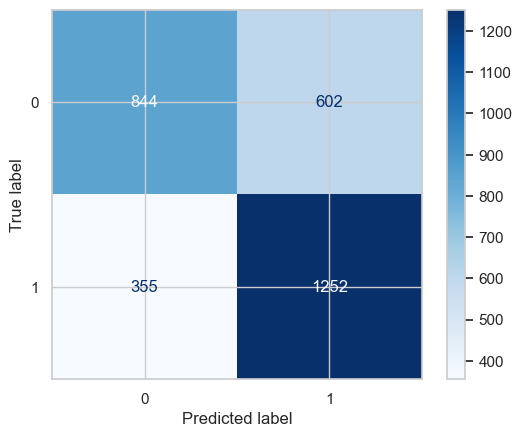

In [90]:
cm = confusion_matrix(y_test, rf_preds, labels=rf1.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=rf1.classes_, 
                             )
disp.plot(values_format='', cmap='Blues');

The model exhibits a higher likelihood of predicting false positives compared to false negatives, almost twice as much. Consequently, type I errors are more prevalent. This outcome is less favorable, as it is preferable for a driver to be pleasantly surprised by a generous tip when not anticipated than to be disappointed by a lower tip when expecting generosity. Despite this, the overall performance of the model remains satisfactory.

**Plotting Feature Importance Graph:**

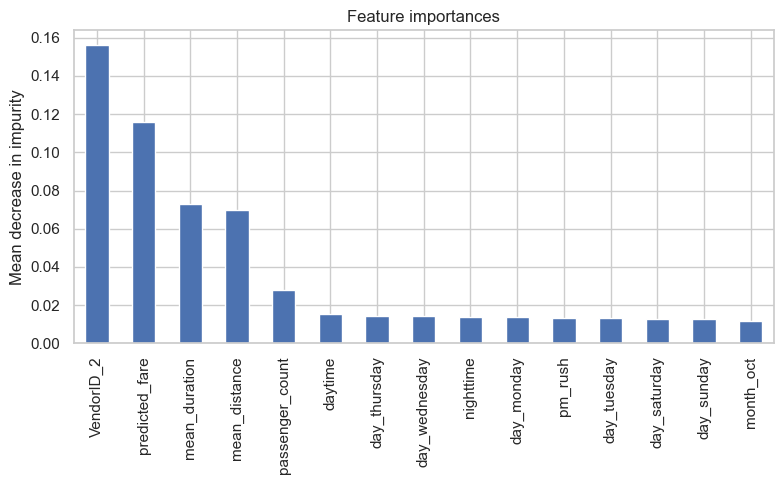

In [91]:
importances = rf1.best_estimator_.feature_importances_
rf_importances = pd.Series(importances, index=X_test.columns)
rf_importances = rf_importances.sort_values(ascending=False)[:15]
fig, ax = plt.subplots(figsize=(8,5))
rf_importances.plot.bar(ax=ax)
ax.set_title('Feature importances')
ax.set_ylabel('Mean decrease in impurity')
fig.tight_layout();

**------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**